## Traditional ML classification models under wavelet analysis structures

In [1]:
import numpy as np
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
import pandas as pd
from sklearn.metrics import accuracy_score
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

### Implementations
#### Read Data

In [2]:
# Configurations - Feature names
LOWLUX = 'lowlux'
MIDLUX = 'middlelux'
HIGHLUX = 'highlux'
NOBACK = 'nothing'
ONEBACK = 'ONEBACK'
TWOBACK = 'TWOBACK'
THREEBACK = 'THREEBACK'
FILENAME = 'Filename'
IPA2 = 'IPA 2'
INDEX = 'index'
LUX = 'Luminance'
LABELS = 'Labels'
ISBLINK_LEFT = 'isBlink-Left'
ISBLINK_RIGHT = 'isBlink-Right'
PID = 'PID'
AVE_DM = 'Averaged Diameter'
DIFF_DM = 'Difference Diameter'

# Training and testing ratio.
TEST_SIZE_PCT = 0.1

# Setting thresholds for 2 eyes' blinking rates.
THRES_BLINKING_RATE = 1

In [3]:
# Read data and make them into processable formalities.
filepath = '../Data/Results/21-11-13-13/results.csv'
df_raw_features = pd.read_csv(filepath)

In [4]:
df_raw_features

,Left-0,Left-1,Left-2,Left-3,Left-4,Left-5,Left-6,Left-7,Left-8,Left-9,...,Right-147,Right-148,Right-149,Averaged Diameter,Difference Diameter,isBlink-Left,isBlink-Right,Luminance,PID,Labels
0,90.878101,90.000122,89.429937,90.488841,90.425234,90.336186,90.534690,90.501258,90.304912,90.299277,...,94.824154,95.681502,95.550234,46.214449,-2.993481,0.325000,0.370000,lowlux,7,nothing
1,90.272990,90.943095,90.475785,90.534682,90.372235,90.283447,90.175733,90.071457,89.966849,89.862239,...,94.965808,95.486500,94.833888,46.102734,-2.943094,0.168333,0.203333,lowlux,7,nothing
2,89.356322,88.406687,88.938648,89.101954,88.632723,89.213376,88.886822,88.681709,89.061931,88.684184,...,96.326834,96.544795,95.752655,46.330987,-3.043528,0.000000,0.000000,lowlux,7,nothing
3,89.591427,90.381350,89.822829,90.178344,90.201855,90.039328,89.327095,90.271126,89.445756,89.488081,...,94.325592,93.692027,93.015056,46.389218,-2.974158,0.135000,0.195000,lowlux,7,nothing
4,89.352206,89.354459,90.085756,90.154200,90.493916,88.939724,89.547730,90.279304,90.332414,91.536459,...,93.245723,93.272628,94.553329,45.993263,-2.558402,0.135000,0.195000,lowlux,7,nothing
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2807,93.249352,93.249352,93.249352,93.249352,93.249352,93.249352,93.249352,93.249352,93.249352,93.249352,...,91.581850,91.573155,91.780403,46.211527,0.826298,1.000000,0.431667,lowlux,2,THREEBACK
2808,93.249352,93.249352,93.249352,93.249352,93.249352,93.249352,93.249352,93.249352,93.249352,93.249352,...,91.303723,91.315547,91.318091,46.219696,0.809960,1.000000,0.530000,lowlux,2,THREEBACK
2809,93.249352,93.249352,93.249352,93.249352,93.249352,93.249352,93.249352,93.249352,93.249352,93.249352,...,91.241145,91.231029,91.214267,46.202013,0.845325,1.000000,0.663333,lowlux,2,THREEBACK
2810,93.249352,93.249352,93.249352,93.249352,93.249352,93.249352,93.249352,93.249352,93.249352,93.249352,...,89.802735,90.034177,89.511720,46.105213,1.038926,1.000000,0.816667,lowlux,2,THREEBACK


#### Encoder

This part encodes features into numeric values.

In [5]:
# Encoding and Labeling
luxes = []
nbacks = []
df_numeric_features = df_raw_features.copy()

for index, row in df_numeric_features.iterrows():
    # Label luxes
    if LOWLUX in row[LUX]:
        luxes.append(30)
    elif MIDLUX in row[LUX]:
        luxes.append(4500)
    elif HIGHLUX in row[LUX]:
        luxes.append(15000)
    
    # Label task difficulties
    if NOBACK in row[LABELS]:
        nbacks.append(0)
    elif ONEBACK in row[LABELS]:
        nbacks.append(1)
    elif TWOBACK in row[LABELS]:
        nbacks.append(2)
    elif THREEBACK in row[LABELS]:
        nbacks.append(3)
        
df_numeric_features[LUX] = luxes
df_numeric_features[LABELS] = nbacks

In [6]:
df_numeric_features

,Left-0,Left-1,Left-2,Left-3,Left-4,Left-5,Left-6,Left-7,Left-8,Left-9,...,Right-147,Right-148,Right-149,Averaged Diameter,Difference Diameter,isBlink-Left,isBlink-Right,Luminance,PID,Labels
0,90.878101,90.000122,89.429937,90.488841,90.425234,90.336186,90.534690,90.501258,90.304912,90.299277,...,94.824154,95.681502,95.550234,46.214449,-2.993481,0.325000,0.370000,30,7,0
1,90.272990,90.943095,90.475785,90.534682,90.372235,90.283447,90.175733,90.071457,89.966849,89.862239,...,94.965808,95.486500,94.833888,46.102734,-2.943094,0.168333,0.203333,30,7,0
2,89.356322,88.406687,88.938648,89.101954,88.632723,89.213376,88.886822,88.681709,89.061931,88.684184,...,96.326834,96.544795,95.752655,46.330987,-3.043528,0.000000,0.000000,30,7,0
3,89.591427,90.381350,89.822829,90.178344,90.201855,90.039328,89.327095,90.271126,89.445756,89.488081,...,94.325592,93.692027,93.015056,46.389218,-2.974158,0.135000,0.195000,30,7,0
4,89.352206,89.354459,90.085756,90.154200,90.493916,88.939724,89.547730,90.279304,90.332414,91.536459,...,93.245723,93.272628,94.553329,45.993263,-2.558402,0.135000,0.195000,30,7,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2807,93.249352,93.249352,93.249352,93.249352,93.249352,93.249352,93.249352,93.249352,93.249352,93.249352,...,91.581850,91.573155,91.780403,46.211527,0.826298,1.000000,0.431667,30,2,3
2808,93.249352,93.249352,93.249352,93.249352,93.249352,93.249352,93.249352,93.249352,93.249352,93.249352,...,91.303723,91.315547,91.318091,46.219696,0.809960,1.000000,0.530000,30,2,3
2809,93.249352,93.249352,93.249352,93.249352,93.249352,93.249352,93.249352,93.249352,93.249352,93.249352,...,91.241145,91.231029,91.214267,46.202013,0.845325,1.000000,0.663333,30,2,3
2810,93.249352,93.249352,93.249352,93.249352,93.249352,93.249352,93.249352,93.249352,93.249352,93.249352,...,89.802735,90.034177,89.511720,46.105213,1.038926,1.000000,0.816667,30,2,3


#### Data visualization

In [7]:
# sns.pairplot(df_labels_IPA2, hue=LABELS)

#### Implementing with a encapsulated function.

In [8]:
def ml_pipeline(df_input):
    df = df_input.copy()
    # Feature selection
    # Remove PID label / feature.
    df = df.loc[:, df.columns != PID]
    
    # Remove lux
    df = df.loc[:, df.columns != LUX]
    
    # Remove blinks.
    df.hist(column=LABELS)
    before_blinking_filter = len(df)
    df = df.loc[df[ISBLINK_LEFT] <= THRES_BLINKING_RATE]
    df = df.loc[df[ISBLINK_RIGHT] <= THRES_BLINKING_RATE]
    after_blinking_filter = len(df)
    lost_data_num = before_blinking_filter - after_blinking_filter
    print('Before there was: ' + str(before_blinking_filter) + ' instances, then there is : ' + str(after_blinking_filter) + ' instances. ' + str(lost_data_num) + ' instances are lost.')
    df.hist(column=LABELS)
#     df = df.reset_index()  # This will add a feature column index to the dataset, and increases accuracy largely for KNN model. Comment this line. While SVM was less affected by KNN. 
    
    # Split dataset.
    # Get the X and y sets.
    X = df.loc[:, df.columns != LABELS].to_numpy()
    y = df.loc[:, df.columns == LABELS].to_numpy()
    y = np.reshape(y, -1)
    
    # Split the data into training dataset and validation dataset.
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=TEST_SIZE_PCT, random_state=999)
    
    # Train with models.
    # SVM model. TODO: try the SVM model mentioned in 2022 ISMAR and boosting method, and also feature selection method.
    # Try SVM, bacause it is one of the most widely used models in cognitive workload claissfications.
    clf_svm = make_pipeline(StandardScaler(),SVC(kernel='poly', degree=7)) #SVC(kernel='rbf', gamma='auto'))
    clf_svm.fit(X_train, y_train)

    y_pred_svm = clf_svm.predict(X_test)

    score_svm = accuracy_score(y_test, y_pred_svm)
    
    # KNN model.
    # Train the model.
    clf_neigh = KNeighborsClassifier(n_neighbors=5)
    clf_neigh.fit(X_train, y_train)

    # Test.
    y_pred_knn = clf_neigh.predict(X_test)
    # print(y_pred, y_test)

    # Accuracy score calculation.
    score_neigh = accuracy_score(y_test, y_pred_knn)
    
    # Print the results
    print('The SVM result is: ' + str(score_svm) +  '\n The KNN result is: ' + str(score_neigh))

#### Machine Learning Implementations

CPU times: total: 0 ns
Wall time: 0 ns
The baseline results: 
Before there was: 2812 instances, then there is : 2812 instances. 0 instances are lost.
The SVM result is: 0.5106382978723404
 The KNN result is: 0.9929078014184397
The proposed features results: 
Before there was: 2812 instances, then there is : 2812 instances. 0 instances are lost.
The SVM result is: 0.36524822695035464
 The KNN result is: 0.8333333333333334


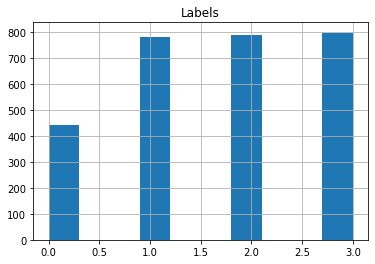

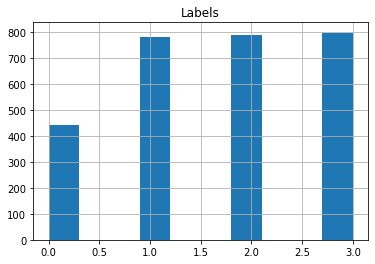

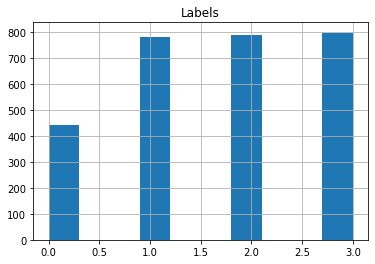

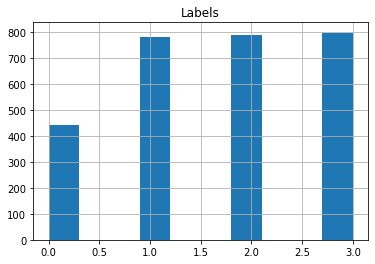

In [9]:
%time
# Test: time-domain feature sets.
time_domain_features = [AVE_DM, DIFF_DM, ISBLINK_LEFT, ISBLINK_RIGHT, LUX, PID, LABELS]
df_baseline_time_features = df_numeric_features[time_domain_features].copy()

# Compare different features.
print('The baseline results: ')
ml_pipeline(df_input=df_baseline_time_features)
print('The proposed features results: ')
ml_pipeline(df_input=df_numeric_features)

In [10]:
# Now the best parameter set:
# param = {train_test_size = 0.1, threshold_blinking_rate=0.7, SVM acc=0.4333, knn_num_neighbor=5, knn acc=0.86699}